### Linear Regression

$\hat y = wx + b$

### Cost Function

$ MSE = J(w, b) = \frac{1}{N} \sum \limits _{i=1} ^{n} (y_{i} - (wx + b))^{2} $
 
$Gradient descent$ 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper'] + df['sales']

In [6]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,359.2
1,44.5,39.3,45.1,10.4,139.3
2,17.2,45.9,69.3,9.3,141.7
3,151.5,41.3,58.5,18.5,269.8
4,180.8,10.8,58.4,12.9,262.9


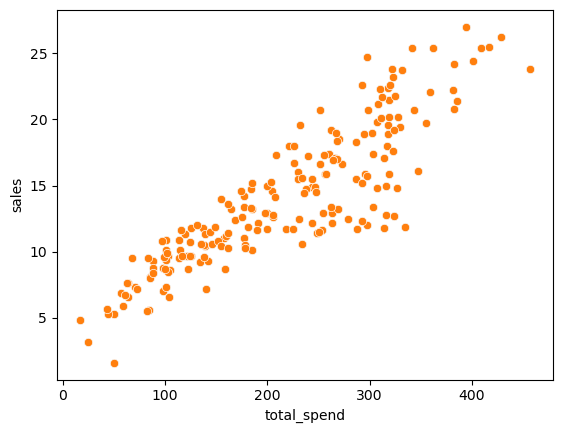

In [8]:
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.show()

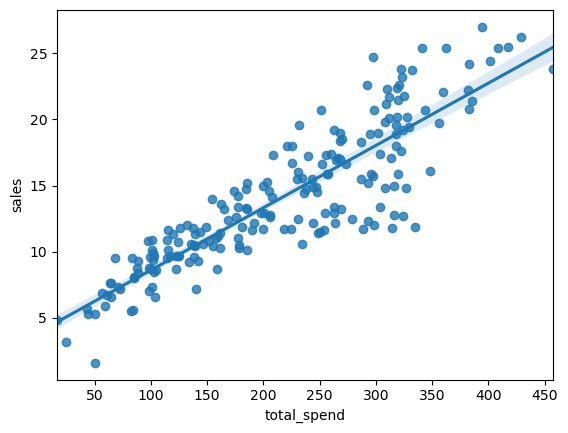

In [9]:
sns.regplot(data=df, x='total_spend', y='sales')
plt.show()

In [10]:
X = df['total_spend']
y = df['sales']

In [11]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting po

In [12]:
#y=mx+b
#y =B1x + B0
#polyfit returns an array of degree(x)+ 1

In [13]:
np.polyfit(X,y,deg=1) # here this returns to values B1 n B0 

array([0.04710145, 3.90119955])

In [14]:
potential_spend = np.linspace(0,500,100)

In [15]:
predicted_sales =  0.04710145*potential_spend + 3.90119955

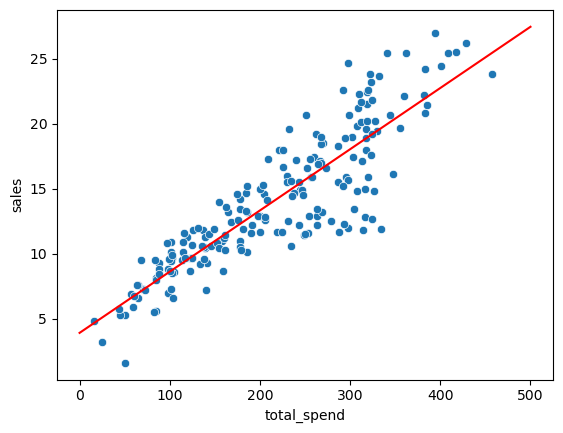

In [18]:
sns.scatterplot(x='total_spend', y='sales', data=df)
plt.plot(potential_spend, predicted_sales, color='red')
plt.show()

### Using Scikit Learn

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


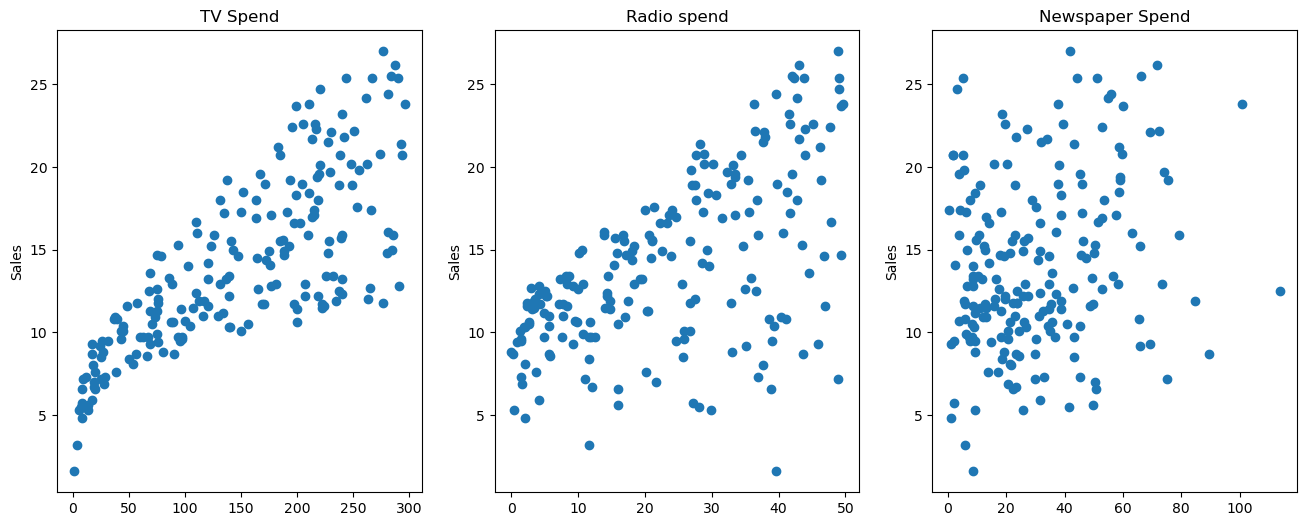

In [4]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio spend")

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper Spend")
plt.show()

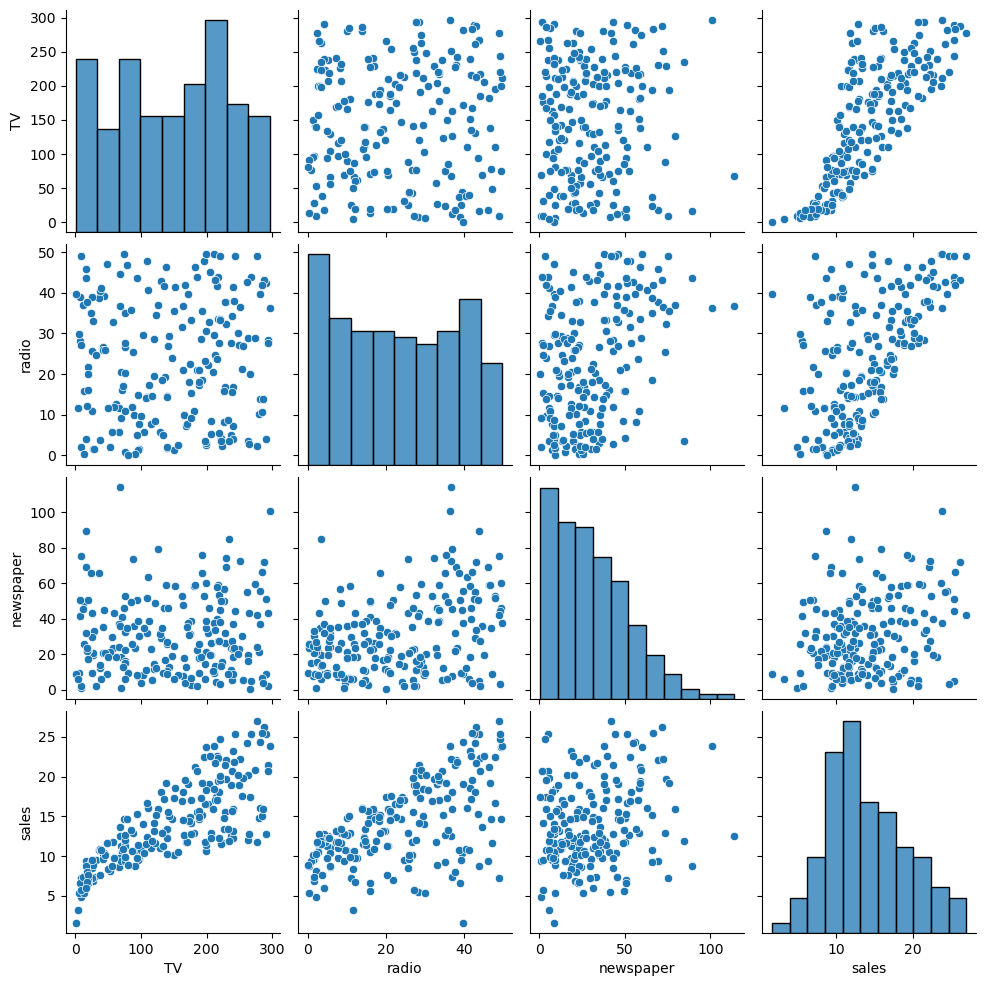

In [5]:
sns.pairplot(df)
plt.show()

In [6]:
X = df.drop('sales',axis=1)

In [7]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [8]:
y = df['sales']

In [9]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101) 
#random state --> shuffles the data
#data should be split equally 

In [12]:
len(df)

200

In [13]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
#help(LinearRegression)

In [16]:
mymodel = LinearRegression()

In [17]:
mymodel.fit(X_train, y_train)

LinearRegression()

In [18]:
test_predict = mymodel.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
df['sales'].mean()

14.0225

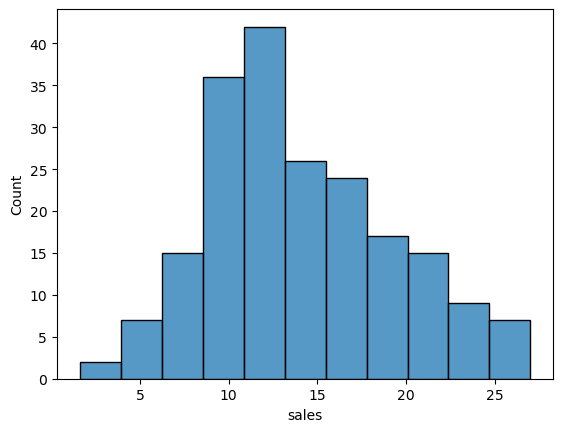

In [21]:
sns.histplot(data=df, x='sales')
plt.show()

In [22]:
mean_absolute_error(y_test, test_predict)

1.213745773614481

In [24]:
# Root mean squared error
np.sqrt(mean_squared_error(y_test, test_predict))

1.516151937599388

In [25]:
test_residuals =y_test - test_predict

In [26]:
test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

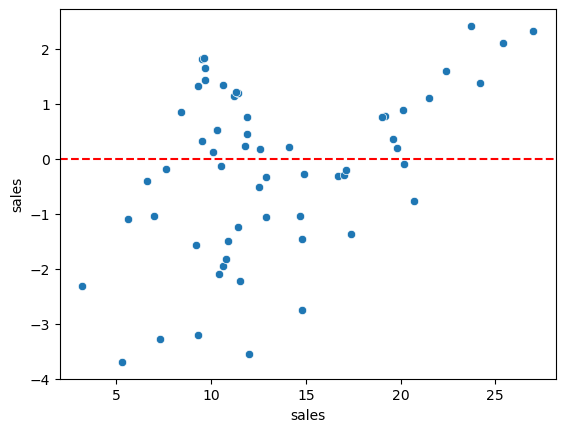

In [31]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--')
plt.show()

D:\Anaconda\envs\my_udemy\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


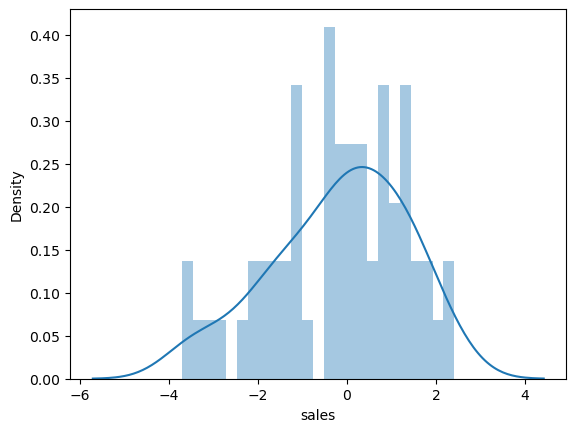

In [32]:
sns.distplot(test_residuals, bins=25, kde=True)
plt.show()

In [33]:
import scipy as sp

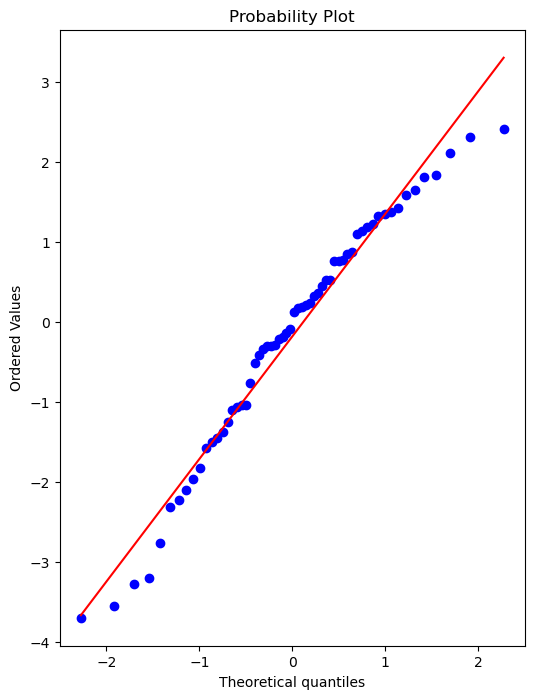

In [34]:
fig, ax = plt.subplots(figsize=(6,8), dpi=100)
_ = sp.stats.probplot(test_residuals, plot=ax)
plt.show()

In [35]:
final_model = LinearRegression()

In [36]:
final_model.fit(X, y)

LinearRegression()

In [37]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [38]:
from joblib import dump, load

In [39]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [40]:
loaded_model= load('final_sales_model.joblib')

In [41]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [42]:
test_x = [[122, 49, 22]]

In [43]:
loaded_model.predict(test_x)

array([17.7373221])

### POlynomial Regression

In [44]:
df = pd.read_csv('Advertising.csv')

In [45]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [46]:
X = df.drop('sales', axis=1)
y = df['sales']

In [47]:
from sklearn.preprocessing import PolynomialFeatures

In [50]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [53]:
polynomial_converter.fit(X) 

PolynomialFeatures(include_bias=False)

In [60]:
poly_features = polynomial_converter.transform(X)

In [61]:
poly_features.shape

(200, 9)

In [62]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [63]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.30, random_state=101)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
model = LinearRegression()

In [68]:
model.fit(X_train, y_train)   

LinearRegression()

In [72]:
test_predict = model.predict(X_test)

In [73]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [74]:
MAE = mean_absolute_error(y_test, test_predict)

In [75]:
MSE = mean_squared_error(y_test, test_predict)

In [76]:
RMSE = np.sqrt(MSE)

In [77]:
MAE

0.4896798044803811

In [78]:
RMSE

0.6646431757269268

In [79]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):
    
    poly_converter = PolynomialFeatures (degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.30, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    

In [80]:
train_rmse_errors

[1.7345941243293763,
 0.587957408529223,
 0.43393443569020673,
 0.3517083688399342,
 0.2509342947031756,
 0.19704459846550335,
 5.421420485986226,
 0.14180598547601236,
 0.16654227322955148]

In [81]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269268,
 0.5803286825165035,
 0.5077742649213955,
 2.575831166466207,
 4.492699702511413,
 1381.4044216899786,
 4449.599748615501,
 95891.24543526075]

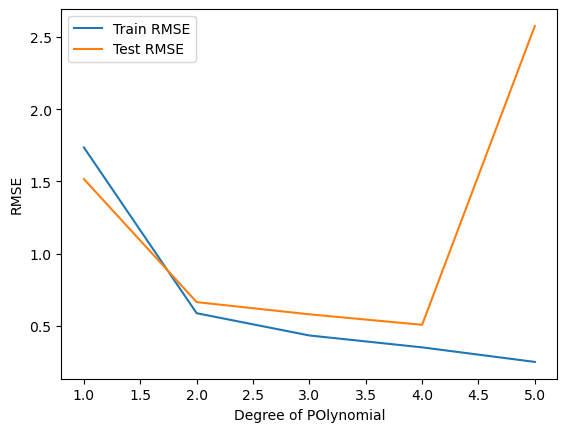

In [86]:
plt.plot(range(1,6), train_rmse_errors[:5], label='Train RMSE')
plt.plot(range(1,6), test_rmse_errors[:5], label='Test RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of POlynomial')
plt.legend()
plt.show()

In [87]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)
    

In [88]:
final_model = LinearRegression()

In [89]:
full_converted_X = final_poly_converter.fit_transform(X)

In [90]:
final_model.fit(full_converted_X, y)

LinearRegression()